In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('ALGERIcleaned.CSV')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
##encoding the categorical variable classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [14]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [15]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [16]:
##dependent and independent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [17]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [18]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [19]:
##Train test split
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Feature selection based on correleation
##Highly positively correlated features we have to remove,not negatively correlated
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

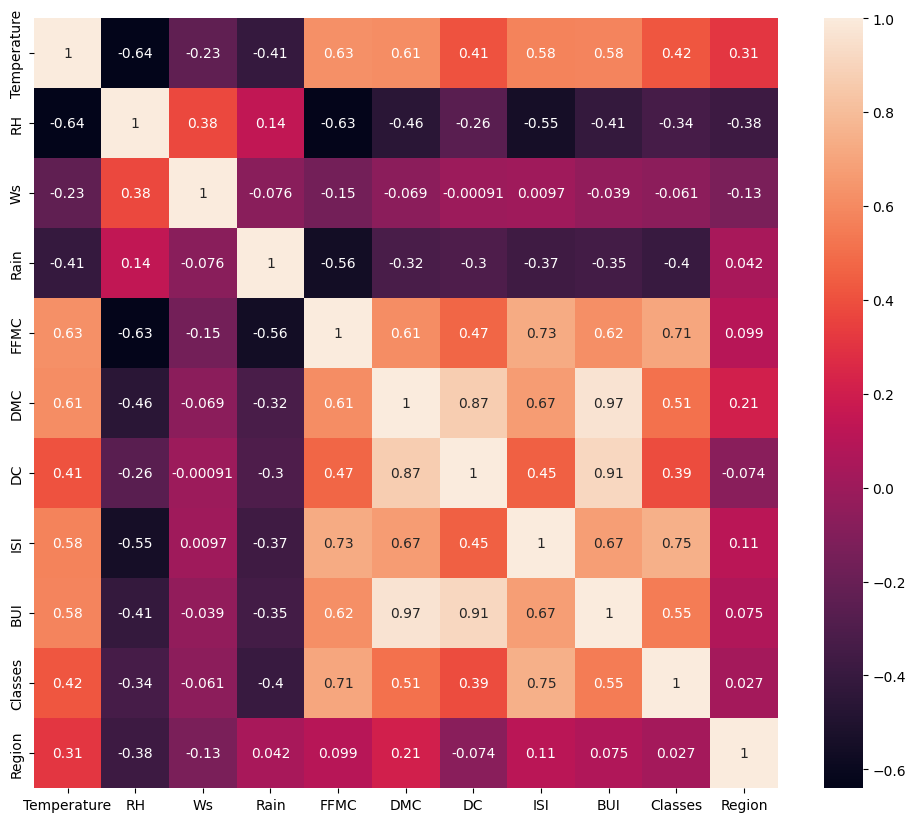

In [23]:
##Check for multi colinearity
plt.figure(figsize=(12,10))
corr=X_test.corr()
sns.heatmap(corr,annot=True)

In [35]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [45]:
corr_features=correlation(X_train,0.85)

In [46]:
##Dropping features with corr more than 85%
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)


In [47]:
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [48]:
##Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [49]:
X_test_scaled

array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
        -0.07699537,  0.17532762,  0.8738629 , -1.01036297],
       [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
        -0.40637763,  0.33729694,  0.8738629 , -1.01036297],
       [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
        -0.91960114, -0.86590375, -1.14434427,  0.98974332],
       [ 0.49652155, -0.25379858, -0.99568804, -0.2841268 ,  0.09950881,
         0.26770699, -0.65765748, -1.14434427,  0.98974332],
       [-0.60120131,  0.21321832, -0.61544497, -0.38015572,  0.51840466,
         0.06088557, -0.10233408,  0.8738629 ,  0.98974332],
       [ 1.86867512,  0.14650162, -2.51666033,  0.1960178 , -0.30518719,
        -0.26849668, -0.88904223, -1.14434427,  0.98974332],
       [-1.15006273,  0.8803853 ,  0.14504117, -0.38015572,  0.29120691,
        -0.82768051, -0.37999578,  0.8738629 ,  0.98974332],
       [ 1.31981369, -1.72156595, -0.99568804, -0.09206896,  0

Text(0.5, 1.0, 'X_train After Scaling')

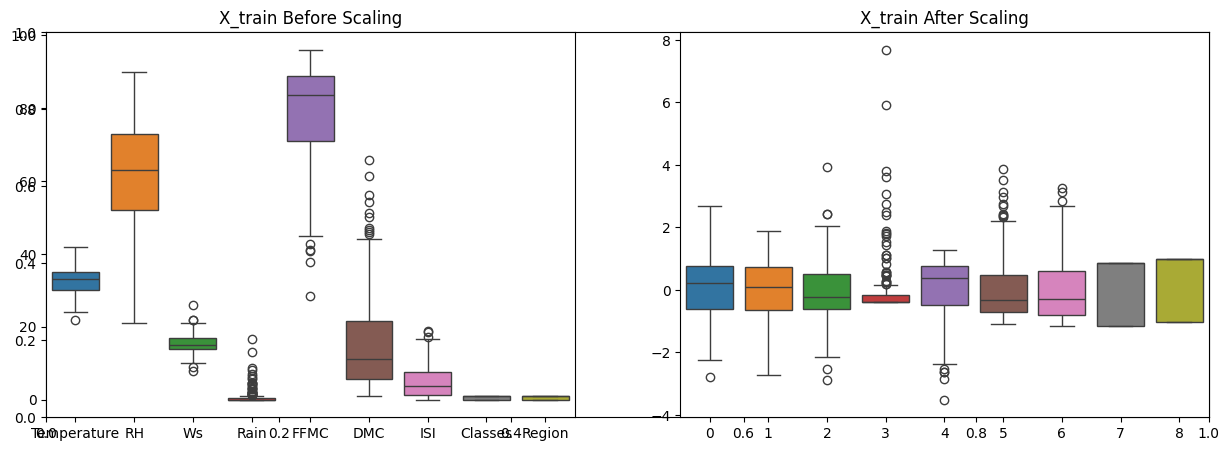

In [50]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

0.5049978694165663
0.9805895859259883


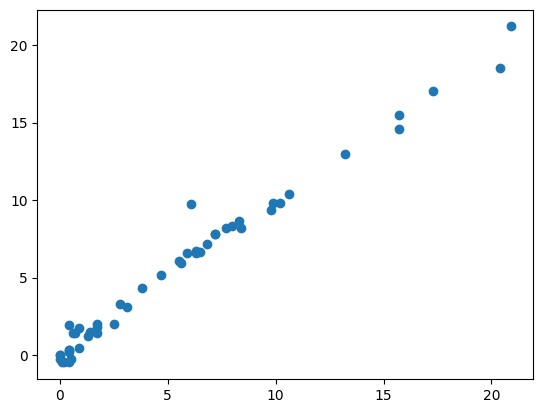

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.0093958923873407
0.9430507350726562


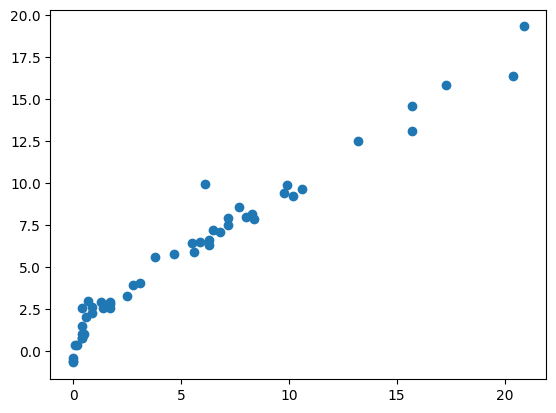

In [55]:
##lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=Lasso()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

0.5192048325844728
0.9801058063273602


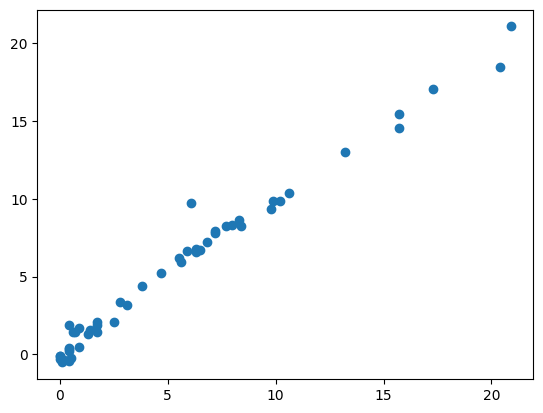

In [63]:
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

1.6834416340136709
0.8676961352267807


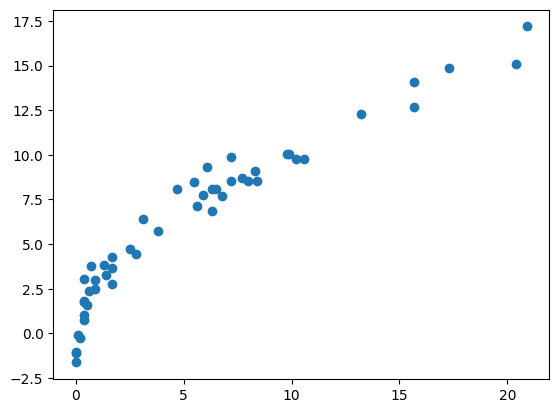

In [57]:
##Elastinet regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=ElasticNet()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)
plt.scatter(y_test,y_pred)

In [59]:
##Cross validation using lasso regresion
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [60]:
lassocv.predict(X_test_scaled)

array([ 8.18663266,  7.70019213, -0.2903297 ,  4.63474259,  6.74887378,
        1.69185044,  2.18294469,  7.60463301,  1.94706338,  3.35359404,
        0.57397807,  9.87337629,  9.35427849, 17.02676621, 18.37194357,
        1.5304227 ,  1.5960953 , -0.52728438,  7.28818222,  3.05013272,
        1.90263103,  0.19405617,  6.49047095,  0.15979868, 21.13853803,
        5.07328595,  5.85087005,  9.77439514, -0.62816931,  9.93571457,
        6.72518268, -0.36716153, 10.34290458, 14.4714937 ,  1.65446616,
        0.7459854 ,  2.01575197,  5.92456507, -0.59756537, -0.52186736,
        6.46663487,  2.01373643,  8.46819727, -0.73832638, 15.45949352,
        8.33848004,  8.45866066,  1.4244129 , 13.0465774 ])

0.5556715031617872
0.978328234520343


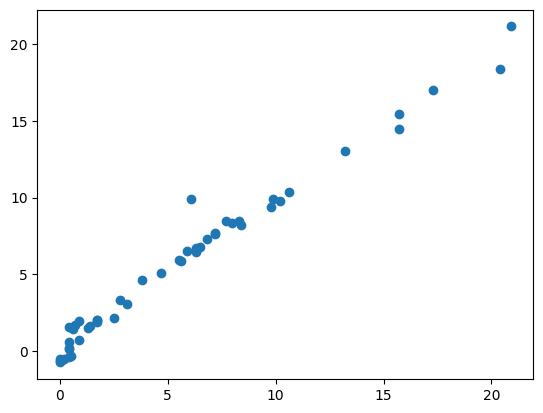

In [61]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)


0.68692620082771
0.9722193780965628


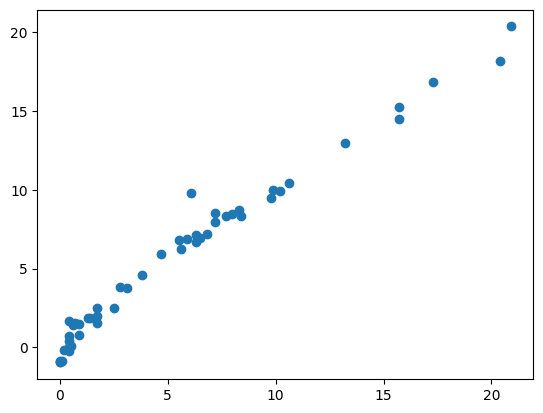

In [62]:
##Cross validation using ridge regresion
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae)
print(score)


In [ ]:
##Same for elastinet cv

In [66]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))